In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "../data/raw/marketing_data_simulated.csv"
df = pd.read_csv(url)

In [22]:
import re

# Read the raw data
with open('../data/raw/marketing_data_simulated.csv', 'r') as file:
    lines = file.readlines()
data = []
for line in lines:
    match = re.match(r'([^,]+),"([^"]+)","([^"]+)","([^"]+)","([^"]+)",(\d+),([0-9.]+),(\d+)', line.strip())
    if match:
        date, action_type, language, content_category, day_of_week, impressions, ctr, clicks = match.groups()
        data.append({
            'Date': date,
            'Action_Type': action_type,
            'Language': language,
            'Content_Category': content_category,
            'Day_of_Week': day_of_week,
            'Impressions': int(impressions),
            'CTR': float(ctr),
            'Clicks': int(clicks)
        })

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Month_Year'] = df['Date'].dt.to_period('M')

## Visualizaciones
### Analisis Univariado

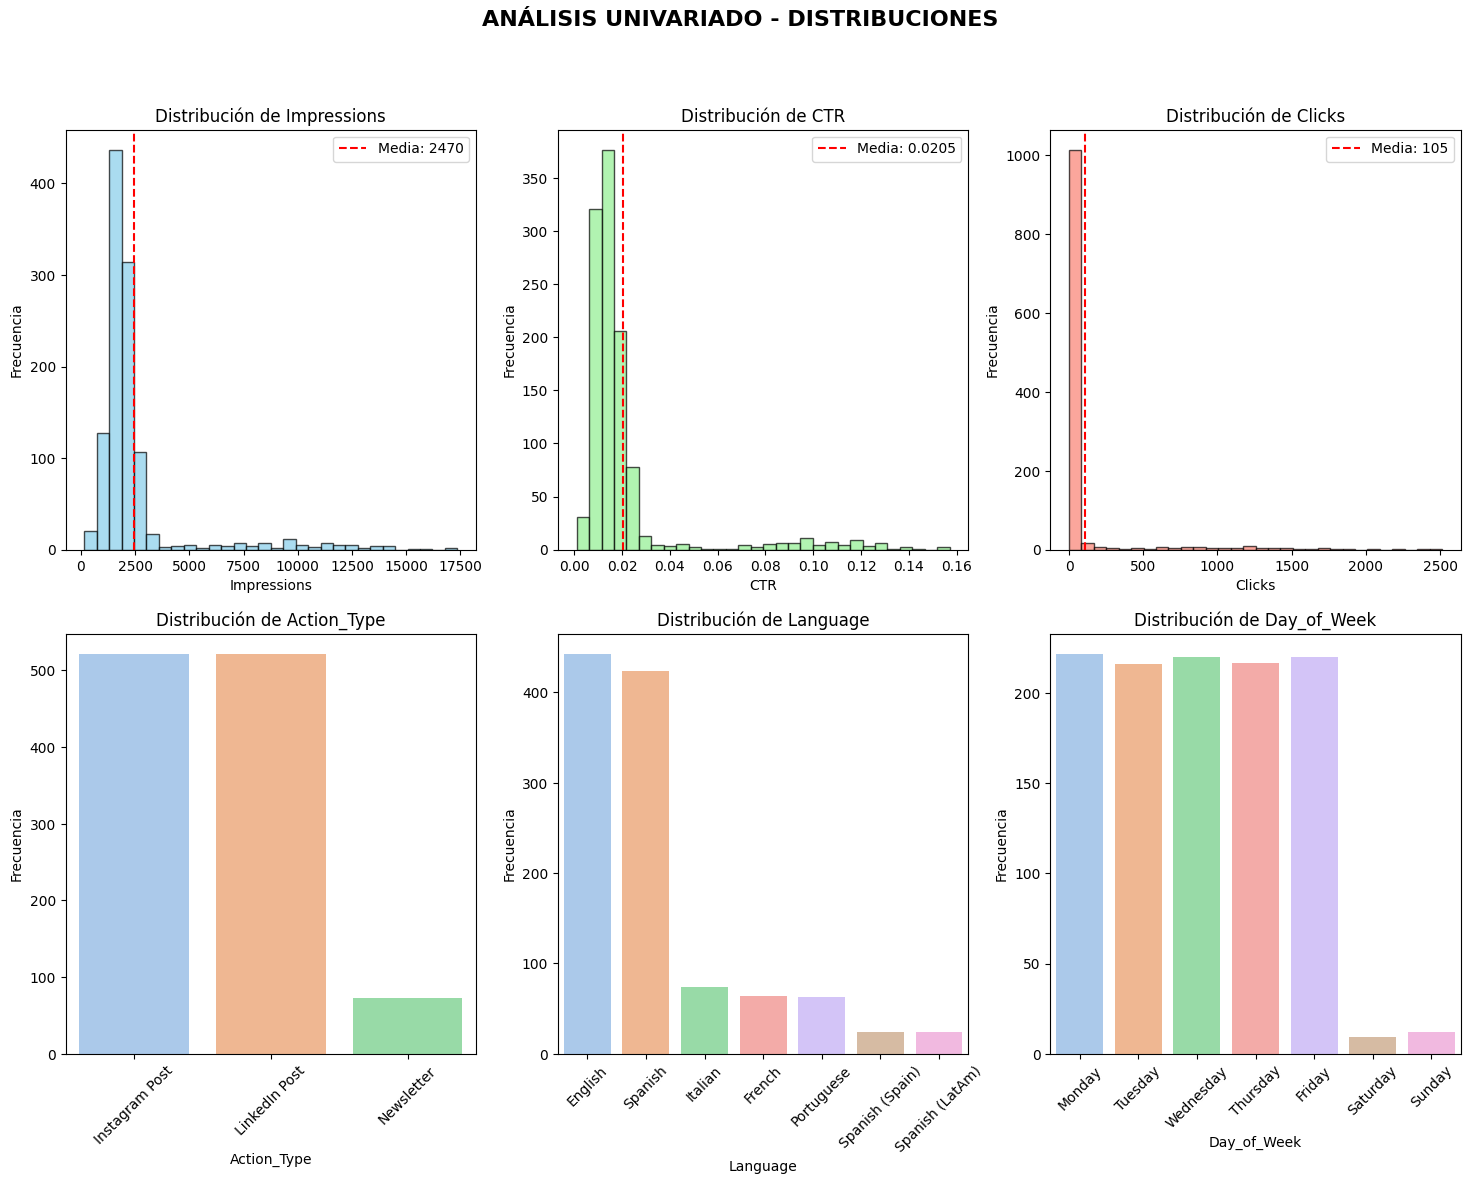

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('ANÁLISIS UNIVARIADO - DISTRIBUCIONES', fontsize=16, fontweight='bold')

''' Histograma de Impresiones'''
axes[0,0].hist(df['Impressions'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribución de Impressions')
axes[0,0].set_xlabel('Impressions')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].axvline(df['Impressions'].mean(), color='red', linestyle='--', label=f'Media: {df["Impressions"].mean():.0f}')
axes[0,0].legend()

''' Histograma de CTR'''
axes[0,1].hist(df['CTR'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribución de CTR')
axes[0,1].set_xlabel('CTR')
axes[0,1].set_ylabel('Frecuencia')
axes[0,1].axvline(df['CTR'].mean(), color='red', linestyle='--', label=f'Media: {df["CTR"].mean():.4f}')
axes[0,1].legend()

''' Histograma de Clicks'''
axes[0,2].hist(df['Clicks'], bins=30, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_title('Distribución de Clicks')
axes[0,2].set_xlabel('Clicks')
axes[0,2].set_ylabel('Frecuencia')
axes[0,2].axvline(df['Clicks'].mean(), color='red', linestyle='--', label=f'Media: {df["Clicks"].mean():.0f}')
axes[0,2].legend()

''' Gráfico de barras para Action_Type'''
action_counts = df['Action_Type'].value_counts()
sns.barplot(x=action_counts.index, y=action_counts.values, ax=axes[1,0], palette='pastel')
axes[1,0].set_title('Distribución de Action_Type')
axes[1,0].set_xlabel('Action_Type')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].tick_params(axis='x', rotation=45)

''' Gráfico de barras para Language'''
language_counts = df['Language'].value_counts()
sns.barplot(x=language_counts.index, y=language_counts.values, ax=axes[1,1], palette='pastel')
axes[1,1].set_title('Distribución de Language')
axes[1,1].set_xlabel('Language')
axes[1,1].set_ylabel('Frecuencia')
axes[1,1].tick_params(axis='x', rotation=45)

''' Gráfico de barras para Day_of_Week'''
day_counts = df['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_counts.index, y=day_counts.values, ax=axes[1,2], palette='pastel')
axes[1,2].set_title('Distribución de Day_of_Week')
axes[1,2].set_xlabel('Day_of_Week')
axes[1,2].set_ylabel('Frecuencia')
axes[1,2].tick_params(axis='x', rotation=45)


### Estadisticas adicionales

In [25]:
print("\n📊 Insights del análisis univariado:")
print(f"• La mayoría de posts tienen entre {df['Impressions'].quantile(0.25):.0f} y {df['Impressions'].quantile(0.75):.0f} impressions")
print(f"• El CTR típico está entre {df['CTR'].quantile(0.25):.4f} y {df['CTR'].quantile(0.75):.4f}")
print(f"• Instagram y LinkedIn tienen casi la misma frecuencia de posts")
print(f"• English y Spanish dominan el contenido ({(df['Language'].isin(['English', 'Spanish']).sum()/len(df)*100):.1f}%)")
print(f"• Platform Improvements y Marketing Automation son las categorías más frecuentes")


📊 Insights del análisis univariado:
• La mayoría de posts tienen entre 1510 y 2303 impressions
• El CTR típico está entre 0.0105 y 0.0185
• Instagram y LinkedIn tienen casi la misma frecuencia de posts
• English y Spanish dominan el contenido (77.7%)
• Platform Improvements y Marketing Automation son las categorías más frecuentes


### Análisis Bivariado

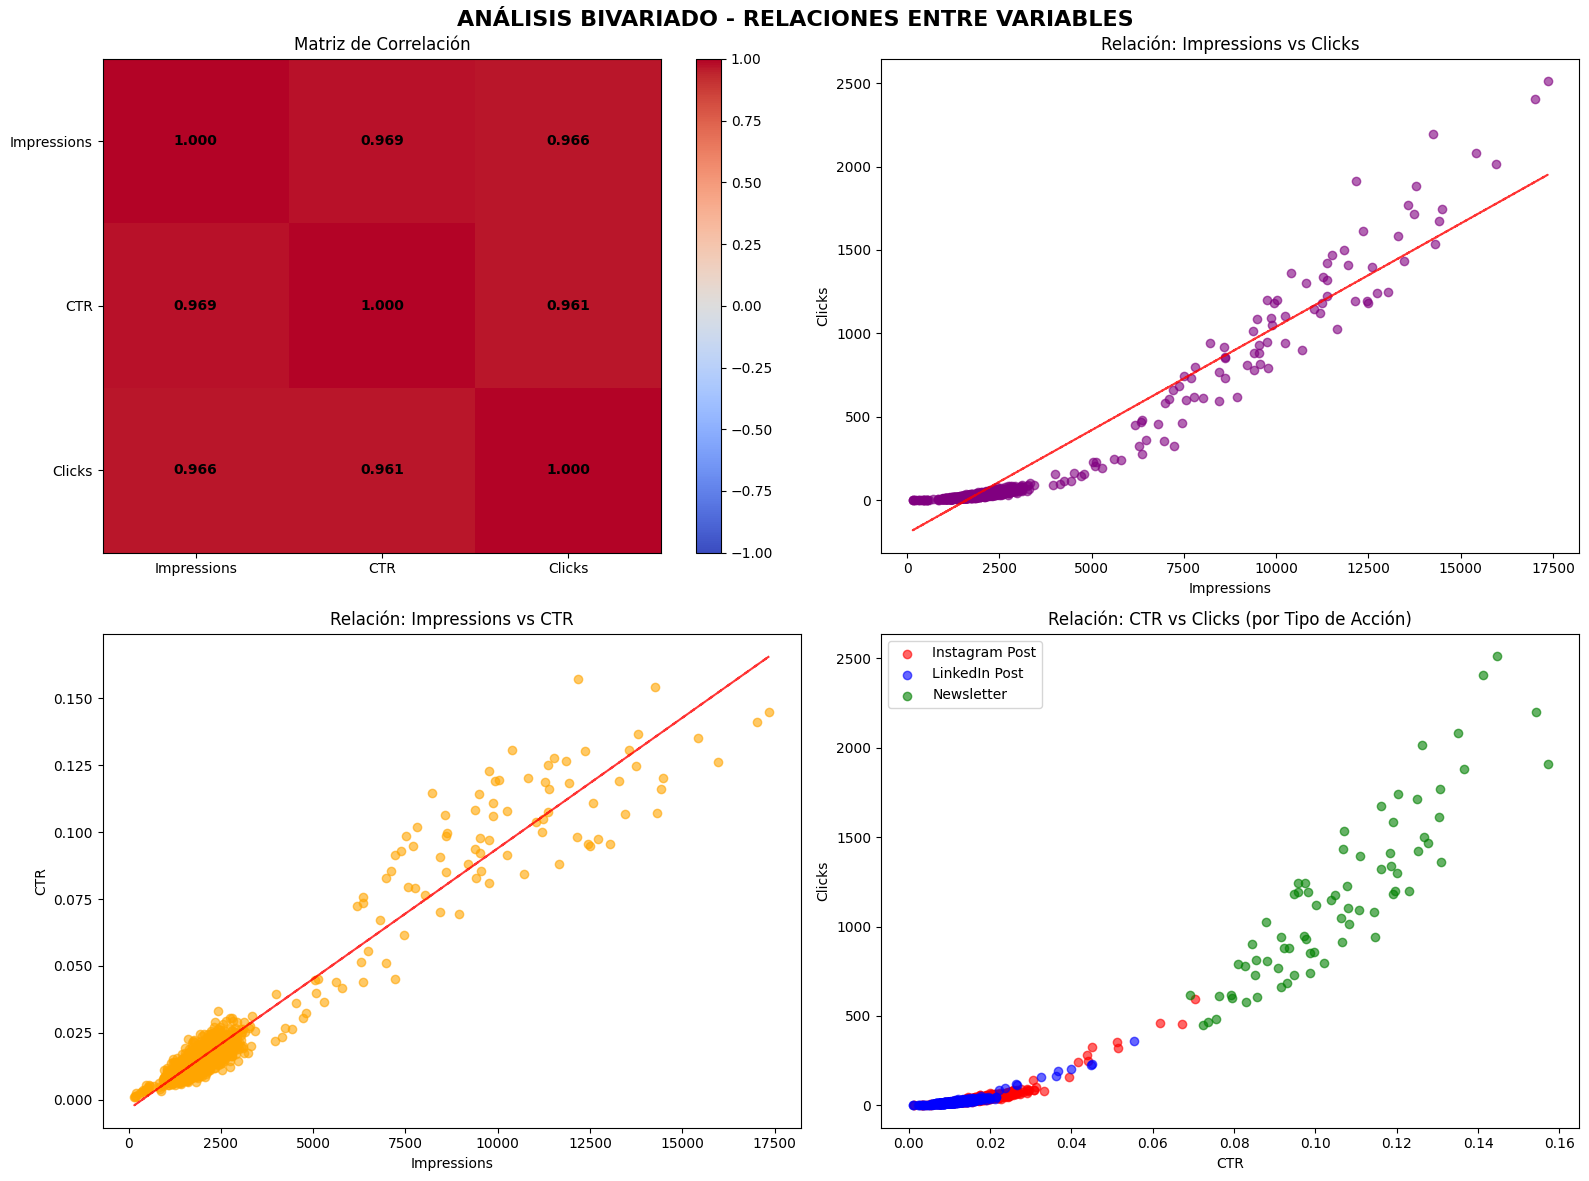

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('ANÁLISIS BIVARIADO - RELACIONES ENTRE VARIABLES', fontsize=16, fontweight='bold')

''' 1. Correlación entre variables numéricas'''
numeric_cols = ['Impressions', 'CTR', 'Clicks']
correlation_matrix = df[numeric_cols].corr()

im = axes[0,0].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[0,0].set_title('Matriz de Correlación')
axes[0,0].set_xticks(range(len(numeric_cols)))
axes[0,0].set_yticks(range(len(numeric_cols)))
axes[0,0].set_xticklabels(numeric_cols)
axes[0,0].set_yticklabels(numeric_cols)

# Añadir valores de correlación
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text = axes[0,0].text(j, i, f'{correlation_matrix.iloc[i, j]:.3f}',
                             ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=axes[0,0])

''' 2. Scatter plot: Impressions vs Clicks'''
axes[0,1].scatter(df['Impressions'], df['Clicks'], alpha=0.6, color='purple')
axes[0,1].set_title('Relación: Impressions vs Clicks')
axes[0,1].set_xlabel('Impressions')
axes[0,1].set_ylabel('Clicks')

# Añadir línea de tendencia
z = np.polyfit(df['Impressions'], df['Clicks'], 1)
p = np.poly1d(z)
axes[0,1].plot(df['Impressions'], p(df['Impressions']), "r--", alpha=0.8)

''' 3. Scatter plot: Impressions vs CTR'''
axes[1,0].scatter(df['Impressions'], df['CTR'], alpha=0.6, color='orange')
axes[1,0].set_title('Relación: Impressions vs CTR')
axes[1,0].set_xlabel('Impressions')
axes[1,0].set_ylabel('CTR')

# Añadir línea de tendencia
z2 = np.polyfit(df['Impressions'], df['CTR'], 1)
p2 = np.poly1d(z2)
axes[1,0].plot(df['Impressions'], p2(df['Impressions']), "r--", alpha=0.8)

''' 4. Scatter plot: CTR vs Clicks (coloreado por Action_Type)'''
colors = {'Instagram Post': 'red', 'LinkedIn Post': 'blue', 'Newsletter': 'green'}
for action_type in df['Action_Type'].unique():
    mask = df['Action_Type'] == action_type
    axes[1,1].scatter(df[mask]['CTR'], df[mask]['Clicks'], 
                     alpha=0.6, label=action_type, color=colors.get(action_type, 'gray'))

axes[1,1].set_title('Relación: CTR vs Clicks (por Tipo de Acción)')
axes[1,1].set_xlabel('CTR')
axes[1,1].set_ylabel('Clicks')
axes[1,1].legend()

plt.tight_layout()
plt.show()

### Calcular correlaciones específicas

In [27]:
print("\n📊 Correlaciones clave:")
print(f"• Impressions vs Clicks: {df['Impressions'].corr(df['Clicks']):.3f}")
print(f"• Impressions vs CTR: {df['Impressions'].corr(df['CTR']):.3f}")
print(f"• CTR vs Clicks: {df['CTR'].corr(df['Clicks']):.3f}")

print("\n🔍 Insights del análisis bivariado:")
if df['Impressions'].corr(df['Clicks']) > 0.7:
    print("• Fuerte correlación positiva entre Impressions y Clicks")
elif df['Impressions'].corr(df['Clicks']) > 0.3:
    print("• Correlación moderada entre Impressions y Clicks")
else:
    print("• Correlación débil entre Impressions y Clicks")

if df['Impressions'].corr(df['CTR']) < -0.1:
    print("• A mayor número de impressions, menor CTR (posible saturación)")
else:
    print("• No hay relación clara entre Impressions y CTR")


📊 Correlaciones clave:
• Impressions vs Clicks: 0.966
• Impressions vs CTR: 0.969
• CTR vs Clicks: 0.961

🔍 Insights del análisis bivariado:
• Fuerte correlación positiva entre Impressions y Clicks
• No hay relación clara entre Impressions y CTR


### Análisis por categorías
- Boxplots

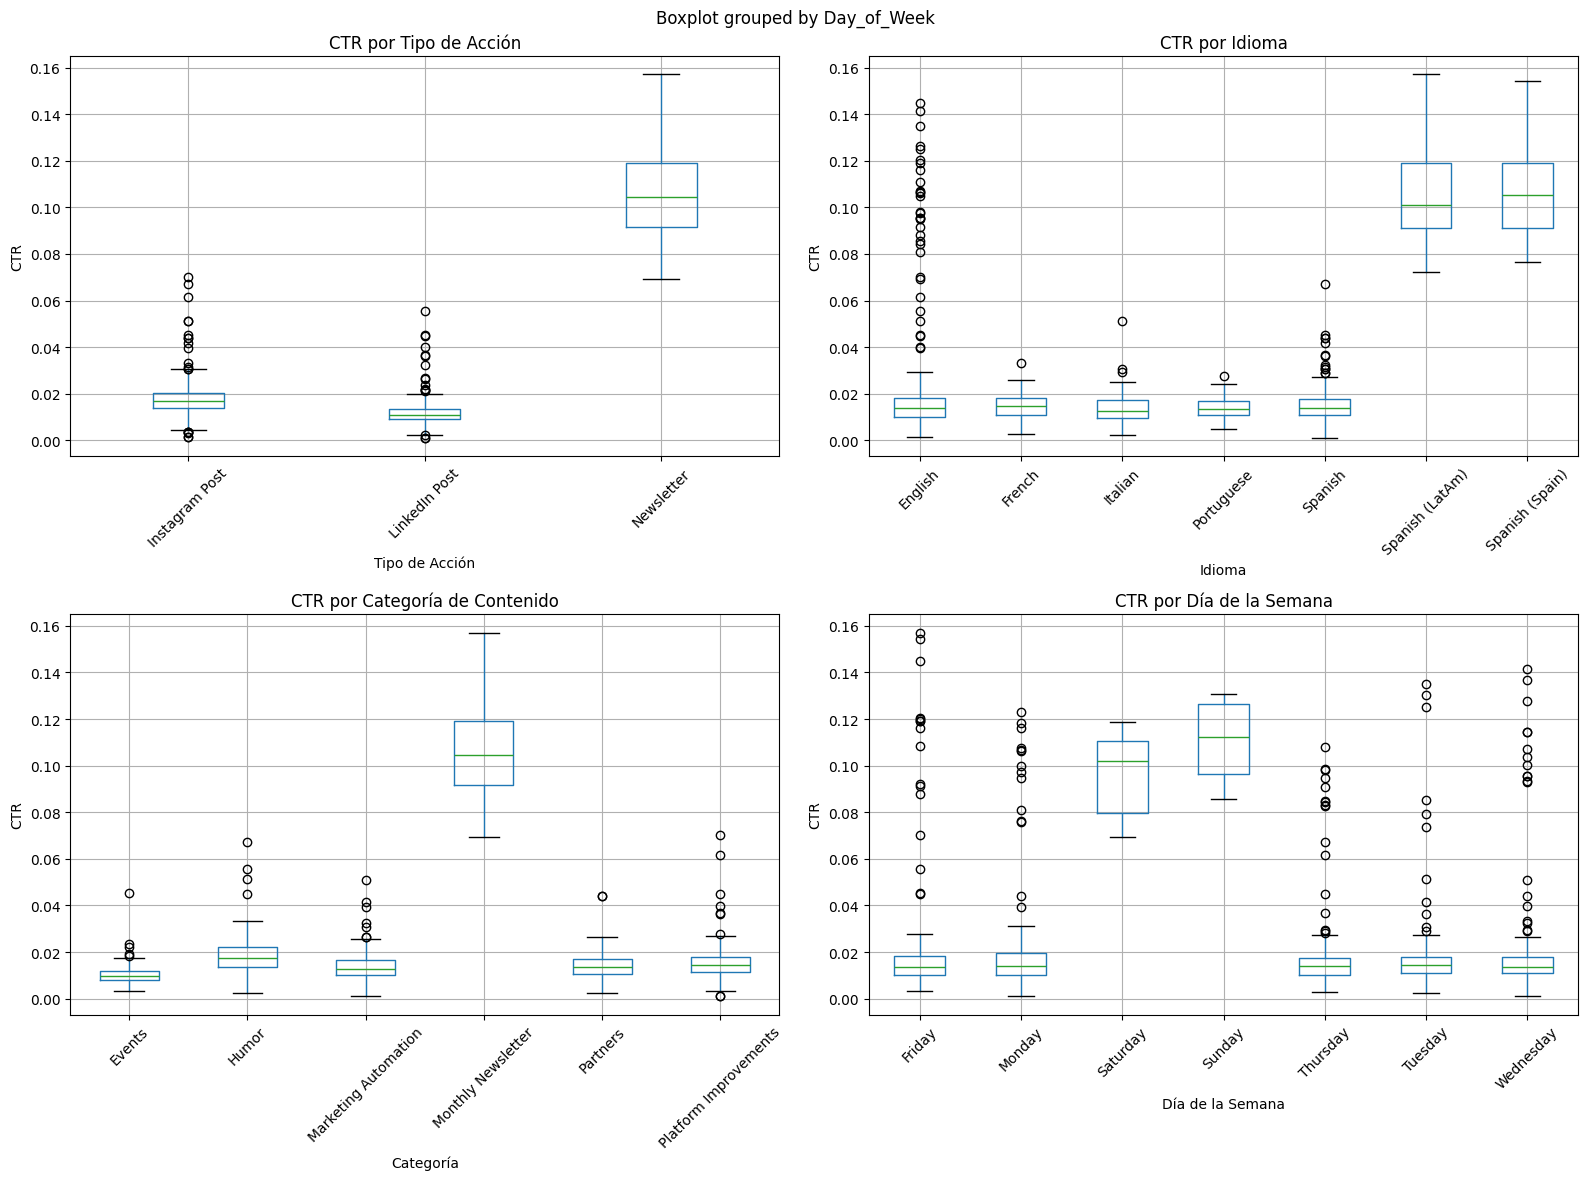

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📦 ANÁLISIS POR CATEGORÍAS - DISTRIBUCIONES', fontsize=16, fontweight='bold')

''' 1. CTR por Action Type'''
df.boxplot(column='CTR', by='Action_Type', ax=axes[0,0])
axes[0,0].set_title('CTR por Tipo de Acción')
axes[0,0].set_xlabel('Tipo de Acción')
axes[0,0].set_ylabel('CTR')
axes[0,0].tick_params(axis='x', rotation=45)

''' 2. CTR por Language '''
df.boxplot(column='CTR', by='Language', ax=axes[0,1])
axes[0,1].set_title('CTR por Idioma')
axes[0,1].set_xlabel('Idioma')
axes[0,1].set_ylabel('CTR')
axes[0,1].tick_params(axis='x', rotation=45)

''' 3. CTR por Content Category '''
df.boxplot(column='CTR', by='Content_Category', ax=axes[1,0])
axes[1,0].set_title('CTR por Categoría de Contenido')
axes[1,0].set_xlabel('Categoría')
axes[1,0].set_ylabel('CTR')
axes[1,0].tick_params(axis='x', rotation=45)

''' 4. CTR por Day of Week '''
df.boxplot(column='CTR', by='Day_of_Week', ax=axes[1,1])
axes[1,1].set_title('CTR por Día de la Semana')
axes[1,1].set_xlabel('Día de la Semana')
axes[1,1].set_ylabel('CTR')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Respectivo análisis estadisticos por categorías

In [29]:
print("\n📊 CTR promedio por categorías:")

print("\n🎯 Por Tipo de Acción:")
ctr_by_action = df.groupby('Action_Type')['CTR'].agg(['mean', 'median', 'std']).round(4)
for action in ctr_by_action.index:
    mean_ctr = ctr_by_action.loc[action, 'mean']
    print(f"  {action}: {mean_ctr:.4f} ({mean_ctr*100:.2f}%)")

print("\n🌍 Por Idioma:")
ctr_by_lang = df.groupby('Language')['CTR'].agg(['mean', 'median', 'std']).round(4)
for lang in ctr_by_lang.index:
    mean_ctr = ctr_by_lang.loc[lang, 'mean']
    print(f"  {lang}: {mean_ctr:.4f} ({mean_ctr*100:.2f}%)")

print("\n📝 Por Categoría de Contenido:")
ctr_by_content = df.groupby('Content_Category')['CTR'].agg(['mean', 'median', 'std']).round(4)
for content in ctr_by_content.index:
    mean_ctr = ctr_by_content.loc[content, 'mean']
    print(f"  {content}: {mean_ctr:.4f} ({mean_ctr*100:.2f}%)")

print("\n📅 Por Día de la Semana:")
ctr_by_day = df.groupby('Day_of_Week')['CTR'].agg(['mean', 'median', 'std']).round(4)
# Ordenar días de la semana correctamente 
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in day_order:
    if day in ctr_by_day.index:
        mean_ctr = ctr_by_day.loc[day, 'mean']
        print(f"  {day}: {mean_ctr:.4f} ({mean_ctr*100:.2f}%)")


📊 CTR promedio por categorías:

🎯 Por Tipo de Acción:
  Instagram Post: 0.0177 (1.77%)
  LinkedIn Post: 0.0116 (1.16%)
  Newsletter: 0.1056 (10.56%)

🌍 Por Idioma:
  English: 0.0196 (1.96%)
  French: 0.0149 (1.49%)
  Italian: 0.0141 (1.41%)
  Portuguese: 0.0140 (1.40%)
  Spanish: 0.0148 (1.48%)
  Spanish (LatAm): 0.1046 (10.46%)
  Spanish (Spain): 0.1062 (10.62%)

📝 Por Categoría de Contenido:
  Events: 0.0106 (1.06%)
  Humor: 0.0184 (1.84%)
  Marketing Automation: 0.0136 (1.36%)
  Monthly Newsletter: 0.1056 (10.56%)
  Partners: 0.0144 (1.44%)
  Platform Improvements: 0.0153 (1.53%)

📅 Por Día de la Semana:
  Monday: 0.0193 (1.93%)
  Tuesday: 0.0173 (1.73%)
  Wednesday: 0.0198 (1.98%)
  Thursday: 0.0178 (1.78%)
  Friday: 0.0203 (2.03%)
  Saturday: 0.0964 (9.64%)
  Sunday: 0.1104 (11.04%)


### Análisis Temporal

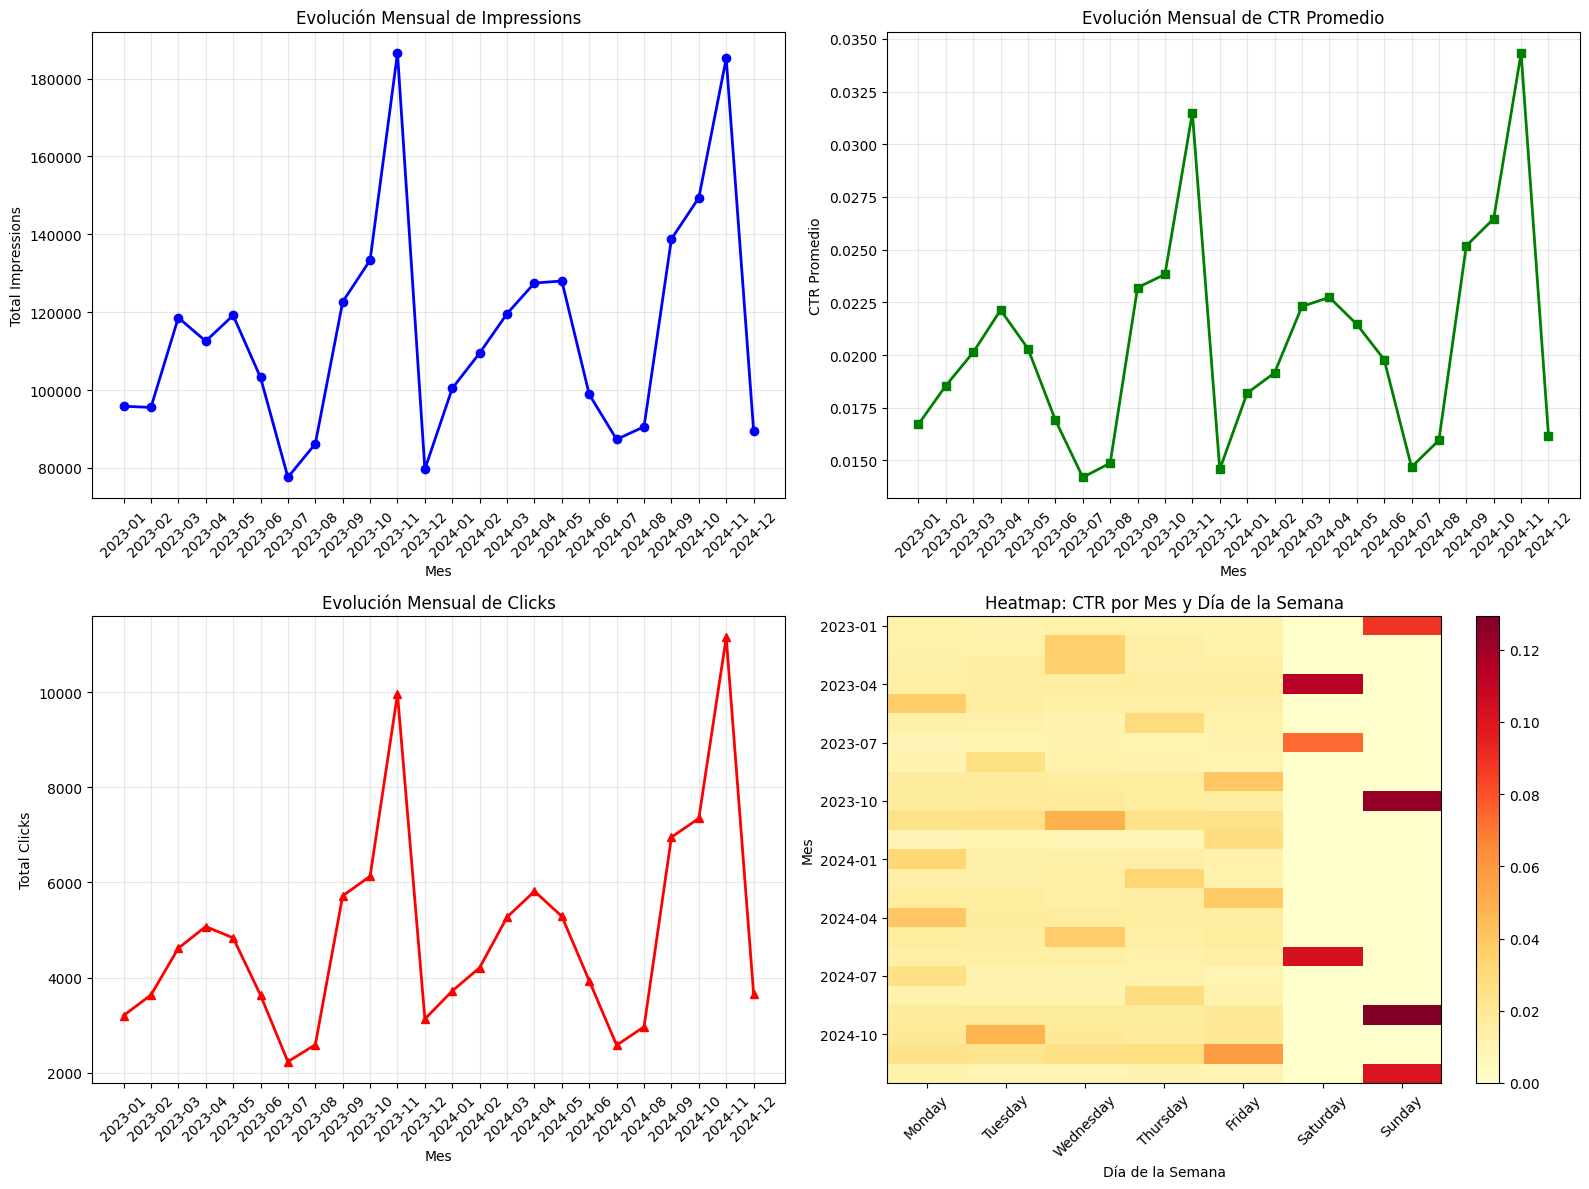

In [30]:
ig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📅 ANÁLISIS TEMPORAL - EVOLUCIÓN DE MÉTRICAS', fontsize=16, fontweight='bold')

# Preparar datos temporales
df['Month'] = df['Date'].dt.to_period('M')
df['Week'] = df['Date'].dt.to_period('W')

'''1. Evolución mensual de Impressions'''
monthly_impressions = df.groupby('Month')['Impressions'].sum()
axes[0,0].plot(monthly_impressions.index.astype(str), monthly_impressions.values, marker='o', linewidth=2, color='blue')
axes[0,0].set_title('Evolución Mensual de Impressions')
axes[0,0].set_xlabel('Mes')
axes[0,0].set_ylabel('Total Impressions')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

'''2. Evolución mensual de CTR promedio'''
monthly_ctr = df.groupby('Month')['CTR'].mean()
axes[0,1].plot(monthly_ctr.index.astype(str), monthly_ctr.values, marker='s', linewidth=2, color='green')
axes[0,1].set_title('Evolución Mensual de CTR Promedio')
axes[0,1].set_xlabel('Mes')
axes[0,1].set_ylabel('CTR Promedio')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

'''3. Evolución mensual de Clicks'''
monthly_clicks = df.groupby('Month')['Clicks'].sum()
axes[1,0].plot(monthly_clicks.index.astype(str), monthly_clicks.values, marker='^', linewidth=2, color='red')
axes[1,0].set_title('Evolución Mensual de Clicks')
axes[1,0].set_xlabel('Mes')
axes[1,0].set_ylabel('Total Clicks')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

'''4. Heatmap de actividad por día de la semana y mes'''
# Crear pivot table para el heatmap
df['Month_str'] = df['Date'].dt.strftime('%Y-%m')
pivot_data = df.groupby(['Month_str', 'Day_of_Week'])['CTR'].mean().unstack(fill_value=0)

# Reordenar días de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_data = pivot_data.reindex(columns=[day for day in day_order if day in pivot_data.columns])

im = axes[1,1].imshow(pivot_data.values, cmap='YlOrRd', aspect='auto')
axes[1,1].set_title('Heatmap: CTR por Mes y Día de la Semana')
axes[1,1].set_xlabel('Día de la Semana')
axes[1,1].set_ylabel('Mes')
axes[1,1].set_xticks(range(len(pivot_data.columns)))
axes[1,1].set_xticklabels(pivot_data.columns, rotation=45)
axes[1,1].set_yticks(range(0, len(pivot_data.index), 3))  # Recuerda mostrar cada 3 meses
axes[1,1].set_yticklabels(pivot_data.index[::3], rotation=0)

plt.colorbar(im, ax=axes[1,1])
plt.tight_layout()
plt.show()

### Analisis de tendencias

In [31]:
print("\n📈 Análisis de tendencias temporales:")
print(f"• Mes con más impressions: {monthly_impressions.idxmax()} ({monthly_impressions.max():,})")
print(f"• Mes con menos impressions: {monthly_impressions.idxmin()} ({monthly_impressions.min():,})")
print(f"• Mes con mejor CTR: {monthly_ctr.idxmax()} ({monthly_ctr.max():.4f})")
print(f"• Mes con peor CTR: {monthly_ctr.idxmin()} ({monthly_ctr.min():.4f})")

''' Análisis por día de la semana '''
print(f"\n📅 Mejor día para publicar (por CTR): {ctr_by_day.idxmax()['mean']} ({ctr_by_day.max()['mean']:.4f})")
print(f"• Peor día para publicar (por CTR): {ctr_by_day.idxmin()['mean']} ({ctr_by_day.min()['mean']:.4f})")


📈 Análisis de tendencias temporales:
• Mes con más impressions: 2023-11 (186,554)
• Mes con menos impressions: 2023-07 (77,617)
• Mes con mejor CTR: 2024-11 (0.0343)
• Mes con peor CTR: 2023-07 (0.0142)

📅 Mejor día para publicar (por CTR): Sunday (0.1104)
• Peor día para publicar (por CTR): Tuesday (0.0173)
